# A3Q4: KMeans Clustering

This notebook is designed to help you practice using the `KMeans` class defined in `kmeans.py`.

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from kmeans import KMeans

## Load and Visualize the Data

First, let's create some synthetic data for clustering.

Data shape: (1000, 2)


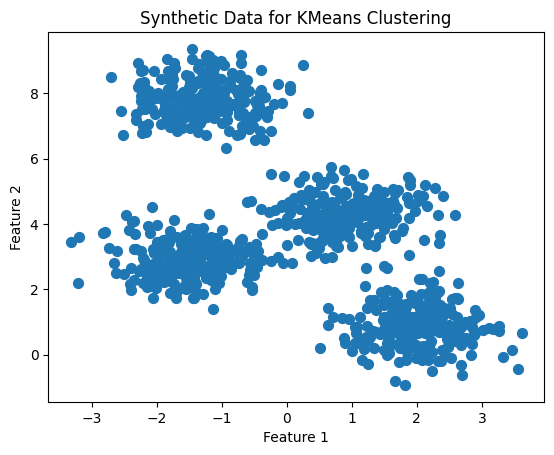

In [2]:
from sklearn.datasets import make_blobs

# Create synthetic data
X, _ = make_blobs(n_samples=1000, centers=4, cluster_std=0.60, random_state=0)
print(f'Data shape: {X.shape}')

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Data for KMeans Clustering')
plt.show()

## Apply KMeans Clustering

Now, let's use the `KMeans` class to cluster the data.

  0%|          | 0/100 [00:00<?, ?it/s]

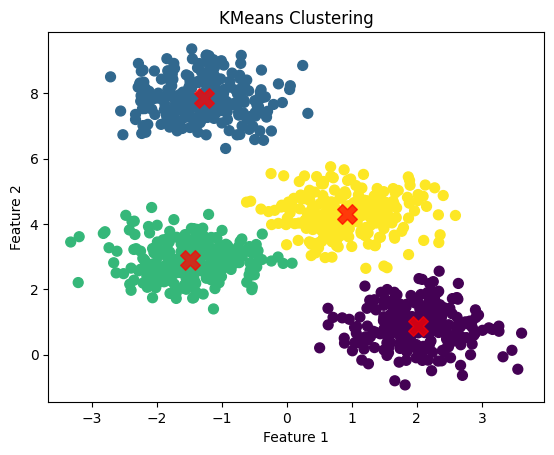

In [3]:
# Initialize KMeans
kmeans = KMeans(n_clusters=4, seed=42, init='random', n_init=100, max_iter=10)

# Fit the model
kmeans.fit(X, algorithm='lloyd')

# Predict the clusters
labels = kmeans.predict(X)

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
centroids = kmeans.centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', alpha=0.75, marker='X')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering')
plt.show()

## Experiment with Different Parameters

Try changing the number of clusters, initialization method, or algorithm, and observe how the results change.

  0%|          | 0/100 [00:00<?, ?it/s]

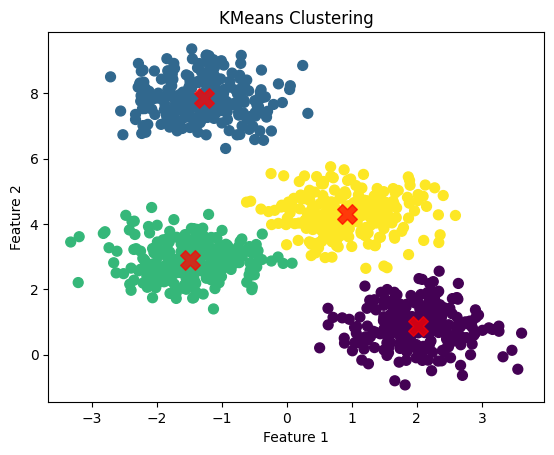

In [4]:
# Initialize KMeans
kmeans = KMeans(n_clusters=4, init='kmeans++', seed=42, n_init=100, max_iter=10)
# Fit the model
kmeans.fit(X, algorithm='lloyd')

# Predict the clusters
labels = kmeans.predict(X)

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
centroids = kmeans.centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', alpha=0.75, marker='X')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering')
plt.show()

  0%|          | 0/100 [00:00<?, ?it/s]

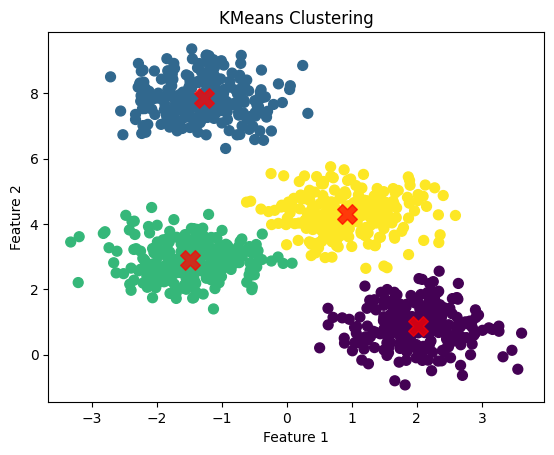

In [5]:
# Initialize KMeans
kmeans = KMeans(n_clusters=4, init='kmeans++', seed=42, n_init=100, max_iter=10)
# Fit the model
kmeans.fit(X, algorithm='elkan')

# Predict the clusters
labels = kmeans.predict(X)

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
centroids = kmeans.centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', alpha=0.75, marker='X')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering')
plt.show()

  0%|          | 0/100 [00:00<?, ?it/s]

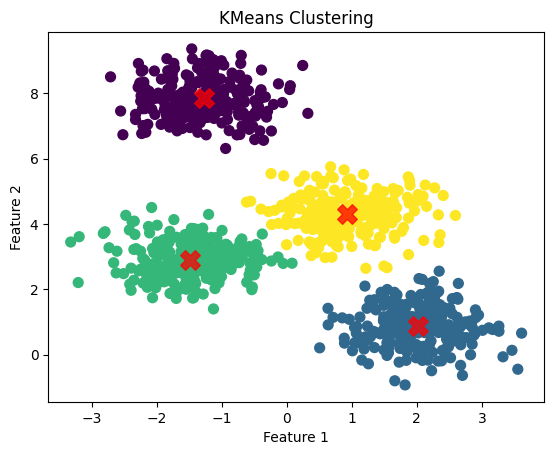

In [6]:
# Initialize KMeans
kmeans = KMeans(n_clusters=4, init='kmeans++', seed=42, n_init=100, max_iter=10)
# Fit the model
kmeans.fit(X, algorithm='hamerly')

# Predict the clusters
labels = kmeans.predict(X)

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
centroids = kmeans.centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', alpha=0.75, marker='X')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering')
plt.show()

## Test with Real Data

In [7]:
import pandas as pd

data = 'aloi-hsb-2x2x2.csv'
df = pd.read_csv(data, delimiter=' ', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.206376,0.018677,0.669332,0.066388,0.006757,0.000000,0.003782,0.028689,img1,1/1_i110.png
1,0.220163,0.023684,0.660923,0.059010,0.006327,0.000000,0.003296,0.026598,img1,1/1_i120.png
2,0.247513,0.031383,0.634790,0.052025,0.006673,0.000000,0.003025,0.024590,img1,1/1_i130.png
3,0.309050,0.037846,0.552253,0.062125,0.007688,0.000002,0.003004,0.028031,img1,1/1_i140.png
4,0.282213,0.036775,0.607571,0.042707,0.007232,0.000000,0.002570,0.020933,img1,1/1_i150.png


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

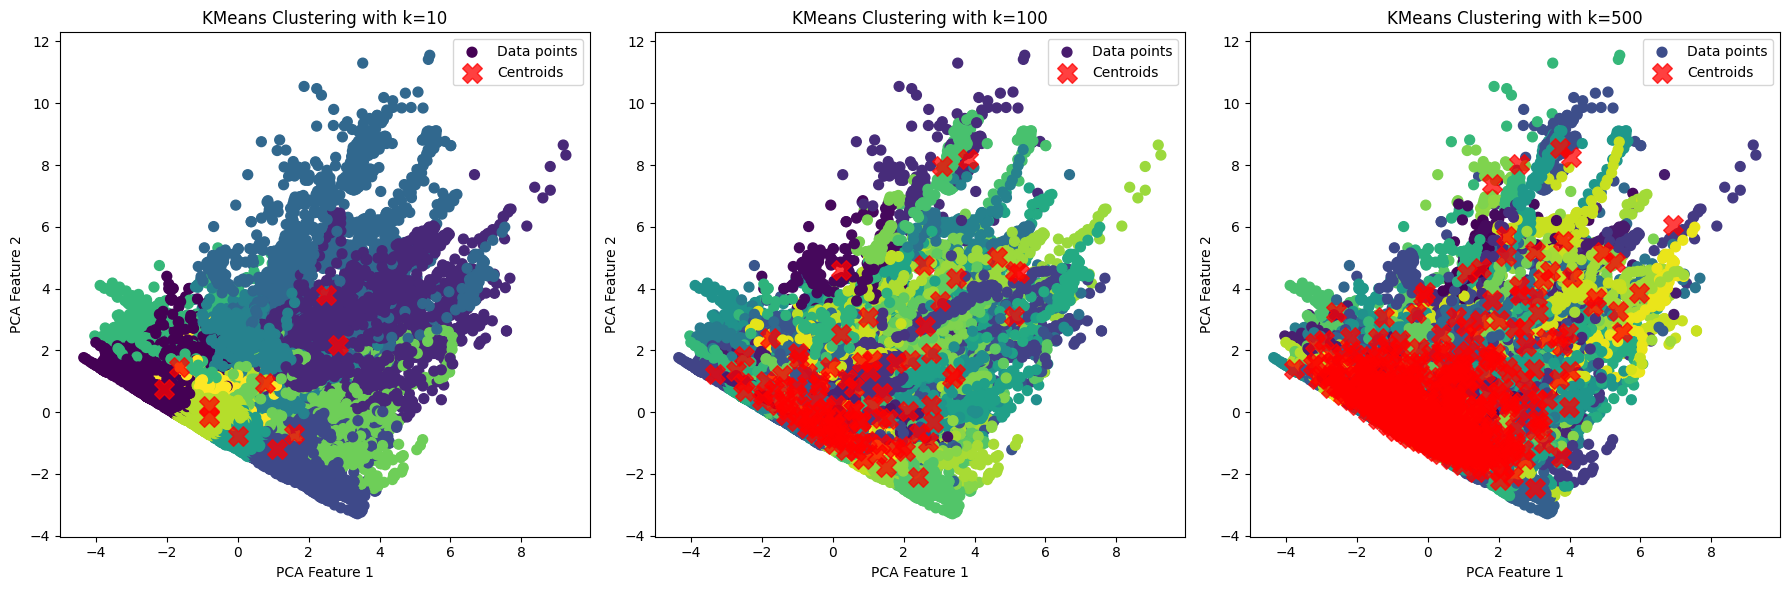

In [8]:
from sklearn.decomposition import PCA
from utils import normalize

# # Subsample the DataFrame
# subsample_fraction = 0.1  # Adjust the fraction as needed
# subsampled_df = df.sample(frac=subsample_fraction, random_state=42, axis=0, replace=False)
# X = normalize(subsampled_df.iloc[:, :-2].values)

X = normalize(df.iloc[:, :-2].values)

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Number of clusters to test
k_values = [10, 100, 500]

# Create subplots
fig, axes = plt.subplots(1, len(k_values), figsize=(18, 6))

for ax, k in zip(axes, k_values):
    # Initialize KMeans
    kmeans = KMeans(n_clusters=k, init='random',
                    seed=42, n_init=100, max_iter=10)

    # Fit the model
    kmeans.fit(X, algorithm='lloyd')

    # Predict the clusters
    labels = kmeans.predict(X)

    # Reduce centroids to 2D using PCA
    centroids_pca = pca.transform(kmeans.centroids)

   # Visualize the clusters
    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=labels,
                         s=50, cmap='viridis', label='Data points')

    ax.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=200,
               c='red', alpha=0.75, marker='X', label='Centroids')

    ax.set_xlabel('PCA Feature 1')
    ax.set_ylabel('PCA Feature 2')
    ax.set_title(f'KMeans Clustering with k={k}')
    ax.legend()

plt.tight_layout()
plt.show()